# Airport Delay Analysis

<h2> Introduction <h2>

In a society where we thrive on performance, competition and perfection, it can be challenging to keep stress levels at a manageable level.  For a large portion of people already juggling moderate to high levels of stress, taking a plane ride can cause a great deal of tension and worry.  Individuals dealing with “flying anxiety” may feel that it is already difficult enough to deal with, without the added strain that unexpected waits and delays can add.  Additionally, plane delays not only create anxiety for those taking the plane, but also for those waiting on the ground.  Family, transportation drivers, and airport staff are among those most affected, when they are waiting for the plane to arrive and it is late.  Having a real-time predicting algorithm that can update and provide individuals with a more accurate estimate of the plane arrival time could solve this problem, but first we need to know if there is a way to accurately predict if a flight will be delayed.


The data set that our group chose to model provides statistics of domestic flights operated by major airlines in the U.S.  The sample data is provided by the U.S. Department of Transportation and contains information on the number of on-time, delayed, canceled, and diverted flights in 2015.   This also includes dates/times of arrivals/departures, flight data, airlines, airports, and distance travelled.  Our group decided to narrow the dataset down to information pertaining to the LAX airport and create a variable for delay status to indicate if a flight is delayed or not.  We also categorized the departure dates/times into seasons of a year, days of a week, and sections (morning, afternoon, evening, midnight) of the day.  The main goal of our project is to build a classification model so that we are able to predict if the arrival of an airplane would be delayed when departing from the LAX airport, based on the departure time groups, delay status, departure delay and flight distance.  

In [1]:
### Run this cell before continuing. 
library(tidyverse)
library(repr)
library(dplyr)
library(tidymodels)
library(tidyr)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

We started by importing built-in libraries including “tidyverse”, “repr”, “dplyr”, “tidymodels” and “tidyr”.  Using their functions, we built our data set, selected and filtered the variables we needed, created and split new data frames, made tables and plots so we could analyze our findings.


***IMPORTANT FOR TAs***<br>
***!!PLEASE READ BEFORE PROCEED!!*** <br>
**The following two cells will not run on server!**<br>
Due to the size of the dataset, the server will automatically stop when we reach its maximum RAM quota.  Hence, the following two cells will not run on the server, but will run locally(and take a long long time).  The two cells demonstrate how we filter our dataset into a smaller and more workable size, and write the chosen data into a .csv file so we could load it into R on the server.
The dataset was originally from Kaggle https://www.kaggle.com/usdot/flight-delays?select=flights.csv and was re-uploaded to OneDrive so R can directly download it.
We then uploaded the created flight.csv file onto OneDrive again for future cells, so please reference these cells as a demo for how we split up the original dataset into only including the desired variables.


In [2]:
#PLEASE DO NOT RUN THIS CELL ON SERVER

# download.file("https://onedrive.live.com/download?cid=388613CB66488271&resid=388613CB66488271%211938&authkey=AP68YxTYtqW--dk", "flights.csv") #download file
# flight <- read_csv("flights.csv") %>%
#         filter(ORIGIN_AIRPORT == "LAX")  #filter original airport to LAX only

# flight

In [3]:
#PLEASE DO NOT RUN THIS CELL ON SERVER
# write.csv(flight, "flight2.csv", row.names=FALSE) #write the filtered dataset into a csv so we can load it on the server later

**The following cell is runable anywhere** <br>
The cell below downloads data that has been filtered locally then uploaded to OneDrive. Hence, please run **EITHER** the two cells above, **OR** the following cell.


In [4]:
download.file("https://onedrive.live.com/download?cid=388613CB66488271&resid=388613CB66488271%211940&authkey=ANvJlPL9F5BDo54", "flight2.csv")
# this download link contains the flight2.csv file that was locally shrinked by steps shown above, then RE-UPLOADED to OneDrive so that this notebook runs without external files
flight <- read_csv("flight2.csv")
flight

Parsed with column specification:
cols(
  .default = col_double(),
  AIRLINE = col_character(),
  TAIL_NUMBER = col_character(),
  ORIGIN_AIRPORT = col_character(),
  DESTINATION_AIRPORT = col_character(),
  SCHEDULED_DEPARTURE = col_character(),
  DEPARTURE_TIME = col_character(),
  WHEELS_OFF = col_character(),
  WHEELS_ON = col_character(),
  SCHEDULED_ARRIVAL = col_character(),
  ARRIVAL_TIME = col_character(),
  CANCELLATION_REASON = col_character()
)

See spec(...) for full column specifications.



YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,⋯,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,0010,⋯,0741,-9,0,0,NA,NA,NA,NA,NA,NA
2015,1,1,4,AA,258,N3HYAA,LAX,MIA,0020,⋯,0756,-9,0,0,NA,NA,NA,NA,NA,NA
2015,1,1,4,US,2013,N584UW,LAX,CLT,0030,⋯,0753,-10,0,0,NA,NA,NA,NA,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2015,12,31,4,AS,471,N570AS,LAX,SEA,2355,⋯,0225,-19,0,0,NA,NA,NA,NA,NA,NA
2015,12,31,4,AA,219,N3LYAA,LAX,ORD,2359,⋯,0544,-19,0,0,NA,NA,NA,NA,NA,NA
2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,⋯,0753,-26,0,0,NA,NA,NA,NA,NA,NA


<h2> Method <h2>

<h3> Data Pre-processing <h3>

The goal of our project was to determine if we can accurately predict if a flight is going to be delayed, therefore, we did not need the following variables in the original dataset: DIVERTED, CANCELLED, CANCELLATION_REASON, AIR_SYSTEM_DELAY, SECURITY_DELAY, AIRLINE_DELAY, LATE_AIRCRAFT_RELDY and WEATHER_DELAY.  
We mutated ARRIVAL_DELAY into binary format for further classification.  We also mutated ARRIVAL_DELAY into a new variable called DELAY_STATUS, to simplify the dataset.  DELAY_STATUS is a binary variable that shows whether or not the flight is delayed, instead of the delayed time in the original variable.
More factors that possibly are related to a flight being delayed are the dates and times of the flight departure.  We decided to split up the months, days of the week and departure time into categories we deemed appropriate.  Months were divided into seasons including Spring, Summer, Fall and Winter.  The months March - May are included in Spring, June - August is Summer, September - November is Fall, and December - February is Winter.  Next, we divided the days of the week into Monday - Friday for Weekday and Saturday - Sunday for Weekend.  Finally, we split up the departure time of the day into Morning, Afternoon, Evening, and Midnight.  6:00am - 11:59am is assigned Morning, 12:00pm - 5:59pm is Afternoon, 6:00pm - 11:59pm is Evening, and 12:00am - 5:59am is Midnight.  Using these splitting rules, we created new columns for each of these three predictor variables, calling them SEASON, WEEKDAY, and DEPARTURE_PART_OF_DAY.  Our goal is to build a classification model to predict whether or not these factors influence if a flight is delayed or not.
We chose to randomly sample 15000 examples out of our data set with nsample(), as higher numbers meant more processing time than we could afford, and our original dataset before sampling run about an hour without showing results on the server. This number of examples already takes around 15 minutes to run.

In [5]:
set.seed(1002)
#As we wanted to predict weather a flight is going to be delayed, we don't want the delayed reasons for each flight, we also want to mutate ARRIVAL_DELAY into a binary for classification
flights <- flight %>%
        select(-DIVERTED, -CANCELLED, -CANCELLATION_REASON, -AIR_SYSTEM_DELAY, -SECURITY_DELAY, -AIRLINE_DELAY, -LATE_AIRCRAFT_DELAY, -WEATHER_DELAY) %>%
        drop_na()%>%
        mutate(DELAY_STATUS = ifelse(ARRIVAL_DELAY >= 0, "Delayed", "Not Delayed")) %>%
        mutate(DELAY_STATUS = fct_rev(as_factor(DELAY_STATUS))) %>%
        mutate(DESTINATION_AIRPORT = as_factor(DESTINATION_AIRPORT)) %>%
        select(-ARRIVAL_DELAY) %>% #after mutating ARRIVAL_DELAY into binary, we need to delete this col as it's no longer useful -- we can't use predictant as predictor
        mutate(SEASON = as_factor(ifelse(MONTH %in% 3:5, "Spring",        #mutate months into seasons
                               ifelse(MONTH %in% 6:8, "Summer",
                                      ifelse(MONTH %in% 9:11, "Fall",
                                             "Winter"))))) %>%
        mutate(WEEKDAY = as_factor(ifelse(DAY_OF_WEEK < 5, "Weekday", "Weekend"))) %>%  #mutate DAY_OF_WEEK into Weekday and Weekend
        mutate(SCHEDULED_DEPARTURE = as.double(SCHEDULED_DEPARTURE)) %>%   #first change SCHEDULED_DEPARTURE from chr into dbl for next step
        mutate(DEPARTURE_PART_OF_DAY = as_factor(ifelse(SCHEDULED_DEPARTURE %in% 600:1159, "Morning",        #mutate SCHEDULED_DEPARTURE into Morning, Afternoon, Evening and Midnight
                                                        ifelse(SCHEDULED_DEPARTURE %in% 1200:1759, "Afternoon",
                                                              ifelse(SCHEDULED_DEPARTURE %in% 1800:2359, "Evening",
                                                                         "Midnight"))))) %>%
        sample_n(15000) # we sampled 15000 examples out of our data set, as the server just refuse to take any larger amount of processing. Our model takes around 15 minutes to run even after this.
        
flights

YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,⋯,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,DELAY_STATUS,SEASON,WEEKDAY,DEPARTURE_PART_OF_DAY
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<fct>,<dbl>,⋯,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<fct>,<fct>,<fct>,<fct>
2015,9,8,2,WN,1468,N635SW,LAX,DEN,1520,⋯,117,862,1824,6,1835,1830,Not Delayed,Fall,Weekday,Afternoon
2015,12,5,6,WN,1349,N7812G,LAX,PHX,1455,⋯,57,370,1710,8,1710,1718,Delayed,Winter,Weekend,Afternoon
2015,3,17,2,WN,739,N8301J,LAX,PHX,2025,⋯,60,370,2133,4,2140,2137,Not Delayed,Spring,Weekday,Evening
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2015,4,4,6,WN,30,N7751A,LAX,LAS,1635,⋯,44,236,1740,3,1735,1743,Delayed,Spring,Weekend,Afternoon
2015,1,25,7,UA,1116,N12225,LAX,SFO,2226,⋯,50,337,2328,4,2351,2332,Not Delayed,Winter,Weekend,Evening
2015,1,1,4,OO,2607,N868CA,LAX,SMF,735,⋯,73,373,0901,7,0900,0908,Delayed,Winter,Weekday,Morning


**REASON FOR THE MUTATIONS** <br>
Using the function initial_split, we randomly split our dataset into 70% for training data and 30% for testing data.  We originally attempted to split it 80% and 20% but due to RAM limitation this was not a viable option.  The training and testing data were assigned to flights_train and flights_test respectively.  

In [6]:
set.seed(1002)
#train test split with 70% as normal practice. We do have a lot of data(190k rows) so we don't need to worry about train set size.
flights_split <- initial_split(flights, prop = 0.7, strata = DELAY_STATUS)  
flights_train <- training(flights_split)   
flights_test <- testing(flights_split)

flights_train
flights_test

YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,⋯,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,DELAY_STATUS,SEASON,WEEKDAY,DEPARTURE_PART_OF_DAY
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<fct>,<dbl>,⋯,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<fct>,<fct>,<fct>,<fct>
2015,9,8,2,WN,1468,N635SW,LAX,DEN,1520,⋯,117,862,1824,6,1835,1830,Not Delayed,Fall,Weekday,Afternoon
2015,12,5,6,WN,1349,N7812G,LAX,PHX,1455,⋯,57,370,1710,8,1710,1718,Delayed,Winter,Weekend,Afternoon
2015,3,17,2,WN,739,N8301J,LAX,PHX,2025,⋯,60,370,2133,4,2140,2137,Not Delayed,Spring,Weekday,Evening
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2015,11,3,2,OO,2906,N492SW,LAX,SMF,1425,⋯,68,373,1559,4,1554,1603,Delayed,Fall,Weekday,Afternoon
2015,11,1,7,OO,4857,N679CA,LAX,SJC,1020,⋯,50,308,1128,3,1142,1131,Not Delayed,Fall,Weekend,Morning
2015,1,1,4,OO,2607,N868CA,LAX,SMF,735,⋯,73,373,0901,7,0900,0908,Delayed,Winter,Weekday,Morning


YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,⋯,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,DELAY_STATUS,SEASON,WEEKDAY,DEPARTURE_PART_OF_DAY
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<fct>,<dbl>,⋯,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<fct>,<fct>,<fct>,<fct>
2015,3,1,7,WN,859,N924WN,LAX,MDW,1255,⋯,185,1750,1930,21,1855,1951,Delayed,Spring,Weekend,Afternoon
2015,8,9,7,WN,3182,N8328A,LAX,DAL,1700,⋯,153,1246,2151,5,2205,2156,Not Delayed,Summer,Weekend,Afternoon
2015,1,27,2,AA,2426,N3KTAA,LAX,DFW,726,⋯,147,1235,1150,9,1225,1159,Not Delayed,Winter,Weekday,Morning
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2015,3,17,2,DL,1754,N137DL,LAX,ATL,1230,⋯,232,1947,1940,19,1951,1959,Delayed,Spring,Weekday,Afternoon
2015,4,4,6,WN,30,N7751A,LAX,LAS,1635,⋯,44,236,1740,3,1735,1743,Delayed,Spring,Weekend,Afternoon
2015,1,25,7,UA,1116,N12225,LAX,SFO,2226,⋯,50,337,2328,4,2351,2332,Not Delayed,Winter,Weekend,Evening


<h3> Data Summary <h3>

Next, we created a new data frame which contains the number of flights corresponding to each season, along with a new mutated column that shows the proportion of flights in each season compared to the total in a year.

In [7]:
summerization <- data.frame("Summer" = nrow(filter(flights_train, SEASON == "Summer")), 
                           "Winter" = nrow(filter(flights_train,  SEASON == "Winter")), 
                           "Fall" = nrow(filter(flights_train, SEASON == "Fall")),
                           "Spring" = nrow(filter(flights_train,  SEASON == "Spring")))
summerization<- summerization%>%
                pivot_longer(cols =  Summer : Spring,
                             names_to ="Season",
                             values_to = "Number_of_Airplanes")
summerization
summerization_proportion<- summerization%>%
                           mutate( proportion = Number_of_Airplanes/ nrow(flights_train))
summerization_proportion

Season,Number_of_Airplanes
<chr>,<int>
Summer,3089
Winter,2694
Fall,1840
Spring,2878


Season,Number_of_Airplanes,proportion
<chr>,<int>,<dbl>
Summer,3089,0.2941625
Winter,2694,0.2565470
Fall,1840,0.1752214
Spring,2878,0.2740691


<h3> Data Visualization <h3>

At this point, we have completed manipulating our data set.  Before we start building our model, we wanted to visualize the relationship between season, part of day and delay status by making a bar chart to make sure there is indeed a relationship.  Using the functions ggplot and geom_bar, we built a bar chart where on the x-axis, we have the seasons of the year, and the y-axis contains the number of delayed and non-delayed flights.  There are a total of 4 independent plots which are separated into flights departing at Midnight, Morning, Afternoon and Evening.


`summarise()` regrouping output by 'DELAY_STATUS', 'DEPARTURE_PART_OF_DAY' (override with `.groups` argument)



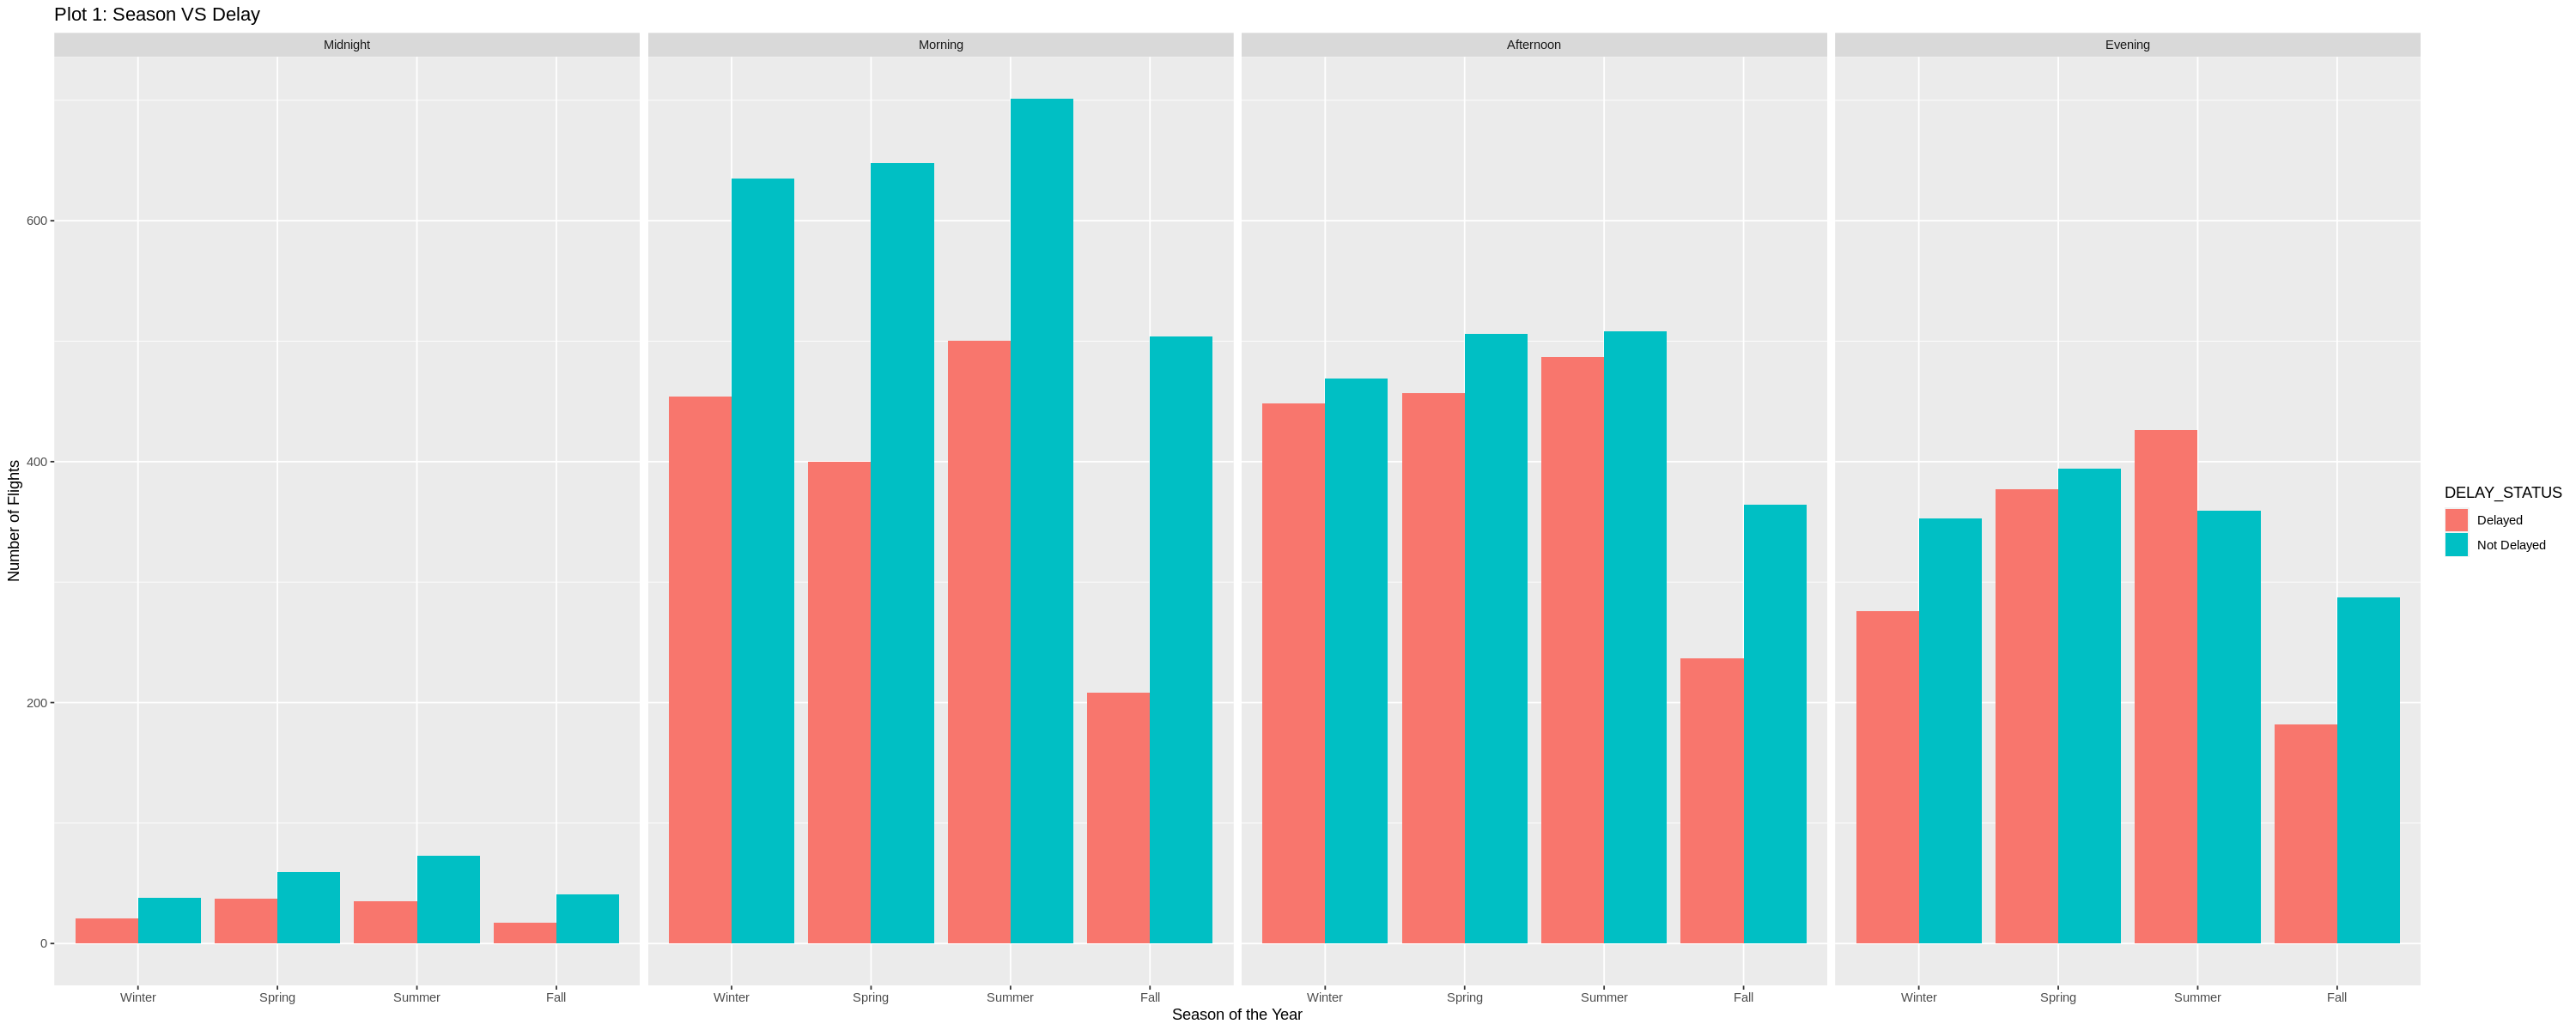

In [8]:
options(repr.plot.width = 25, repr.plot.height = 10) 
season_week_plot <- flights_train %>%
                    group_by(DELAY_STATUS,DEPARTURE_PART_OF_DAY,SEASON)%>%
                    summarise(n = n())%>%
        ggplot(aes(x = SEASON, y = n, fill = DELAY_STATUS)) + 
        geom_bar(stat = "identity",position = "dodge") +
        xlab("Season of the Year") +
        ylab("Number of Flights")+
        ggtitle("Plot 1: Season VS Delay") +
        facet_grid(~DEPARTURE_PART_OF_DAY)

season_week_plot

**===========================================================================================================================================================**

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Now, we formally started to build our model.  Using the nearest_neighbour function, we then tune our model by setting neighbours = tune to find the best k-value for the highest accuracy possible.  Then, we create a recipe by using DEPARTURE_PART_OF_DAY + WEEKDAY + SEASON + DISTANCE + DEPARTURE_DELAY and DELAY_STATUS as the target.  Next, we use the vfold_cv() function to do the cross validation process, because we want to create a single classifier in order to make our prediction more accurate.  If we use cross validation, it minimizes the possibility of luck involved in the prediction model.  

In [9]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
            set_engine("kknn") %>%
            set_mode("classification")
flights_train<- flights_train%>%
                select(DELAY_STATUS, DESTINATION_AIRPORT , SEASON , WEEKDAY , DEPARTURE_PART_OF_DAY, SCHEDULED_DEPARTURE,DISTANCE,TAXI_OUT,DEPARTURE_DELAY)

flights_train

knn_recipe <- recipe(DELAY_STATUS ~DEPARTURE_PART_OF_DAY+WEEKDAY+SEASON+DISTANCE+DEPARTURE_DELAY, data = flights_train)%>% #including new features mentioned
              step_center(DISTANCE)%>% 
              step_scale(DISTANCE)

knn_vfold <- vfold_cv(data = flights_train, v = 5, strata = DELAY_STATUS) #doing cross-validation

DELAY_STATUS,DESTINATION_AIRPORT,SEASON,WEEKDAY,DEPARTURE_PART_OF_DAY,SCHEDULED_DEPARTURE,DISTANCE,TAXI_OUT,DEPARTURE_DELAY
<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
Not Delayed,DEN,Fall,Weekday,Afternoon,1520,862,10,-3
Delayed,PHX,Winter,Weekend,Afternoon,1455,370,8,10
Not Delayed,PHX,Spring,Weekday,Evening,2025,370,10,-2
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Delayed,SMF,Fall,Weekday,Afternoon,1425,373,17,9
Not Delayed,SJC,Fall,Weekend,Morning,1020,308,22,-4
Delayed,SMF,Winter,Weekday,Morning,735,373,18,-5


Next, we use the workflow function to combine the results from the nearest_neighbour and our recipe, and from setting k = 1 to 50, we can see what is the best k value based on the results.  In this case, we select k = 18 since it has the highest accuracy level.  Now, we repeat the nearest_neighbour process like earlier, except we set neighbours = 18 this time.


In [20]:
gridvals<- tibble(neighbors = seq(from = 1,to = 50,by = 1)) #check more neighbrous for higher test score

knn_results <- workflow() %>%
                 add_recipe(knn_recipe) %>%
                 add_model(knn_spec) %>%
                 tune_grid(resamples = knn_vfold, grid = gridvals) %>%
                 collect_metrics()

knn_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.7108854,5,0.004593296,Model01
1,roc_auc,binary,0.7054465,5,0.004714860,Model01
2,accuracy,binary,0.7114575,5,0.005223393,Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
49,roc_auc,binary,0.8098993,5,0.004729183,Model49
50,accuracy,binary,0.7619308,5,0.005408699,Model50
50,roc_auc,binary,0.8096039,5,0.004781718,Model50


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.7108854,5,0.004593296,Model01
2,accuracy,binary,0.7114575,5,0.005223393,Model02
3,accuracy,binary,0.7451694,5,0.003875194,Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
48,accuracy,binary,0.7629780,5,0.004957575,Model48
49,accuracy,binary,0.7618354,5,0.005203790,Model49
50,accuracy,binary,0.7619308,5,0.005408699,Model50


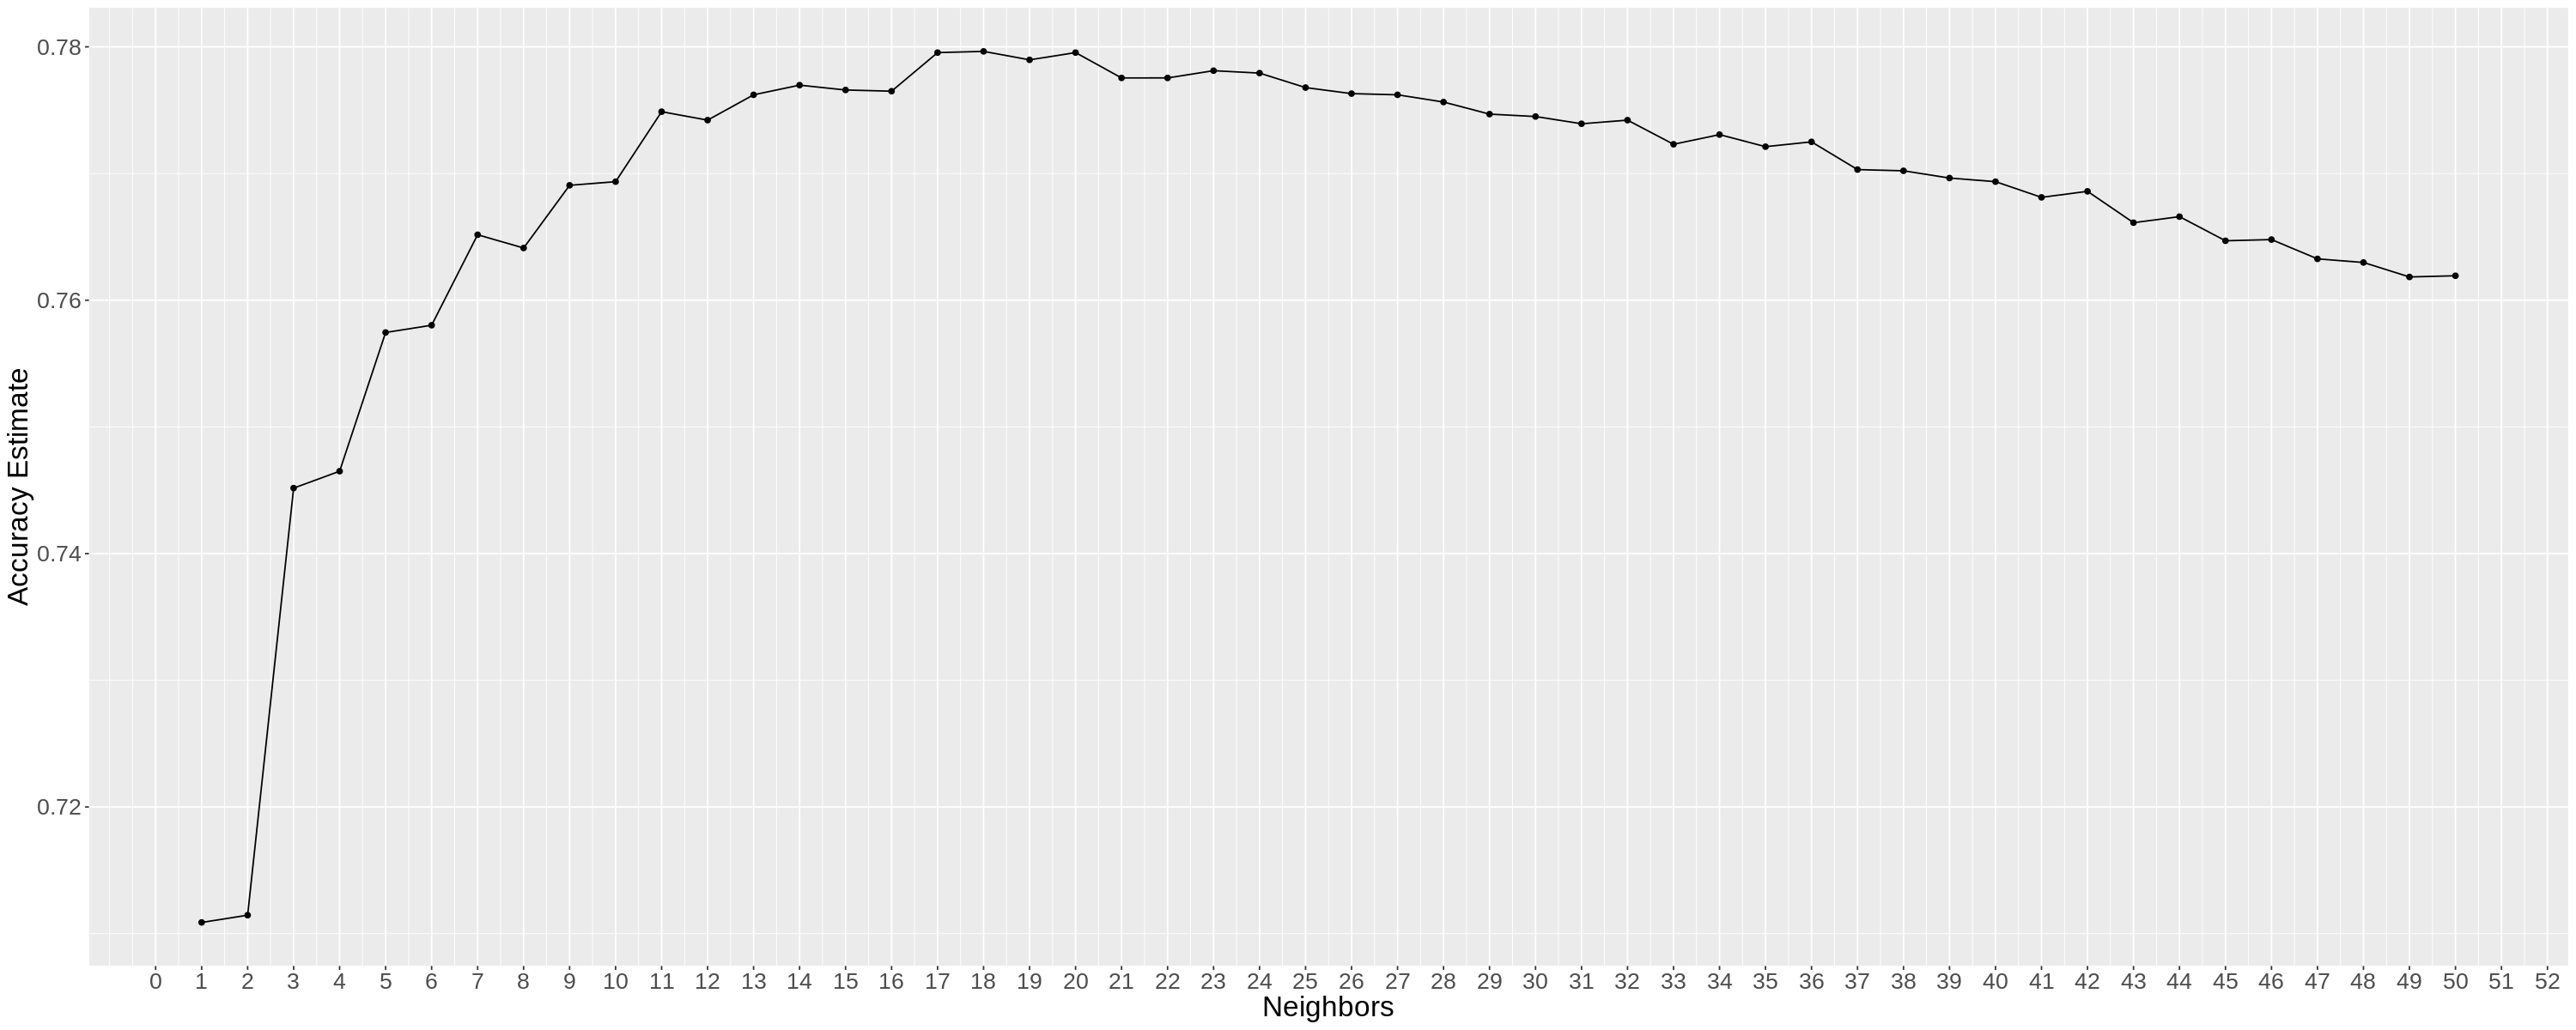

In [12]:
set.seed(1002)
accuracies <- knn_results %>%
                 filter(.metric == 'accuracy')
accuracies

cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
                  geom_point() +
                  geom_line() +
                  labs(x = 'Neighbors', y = 'Accuracy Estimate') +
                  theme(text = element_text(size = 20))+
                  scale_x_continuous(breaks = seq(0, 100, by = 1))
cross_val_plot

In [13]:
k_value<- accuracies%>%
          arrange(desc(mean))%>%
          slice(1)
k_value

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
18,accuracy,binary,0.7796408,5,0.003085051,Model18


With neighbours set to 18, we can see the accuracy of the whole prediction is 77.7%. When the “accuracies” are arranged from low to high, we find that the most accurate neighbour has an accuracy level around 77.9%, which is extremely close to the overall accuracy we found.  This means that the model fits the data very well. 


In [14]:
knn_spec_new <- nearest_neighbor(weight_func = "rectangular", neighbors =18) %>%
            set_engine("kknn") %>%
            set_mode("classification")
flight_fit<- workflow()%>%
             add_recipe(knn_recipe)%>%
             add_model(knn_spec_new)%>%
             fit(data = flights_train)
flight_pred<- flight_fit%>%
              predict(flights_test)%>%
              bind_cols(flights_test)
flight_pred

.pred_class,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,⋯,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,DELAY_STATUS,SEASON,WEEKDAY,DEPARTURE_PART_OF_DAY
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<fct>,⋯,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<fct>,<fct>,<fct>,<fct>
Delayed,2015,3,1,7,WN,859,N924WN,LAX,MDW,⋯,185,1750,1930,21,1855,1951,Delayed,Spring,Weekend,Afternoon
Not Delayed,2015,8,9,7,WN,3182,N8328A,LAX,DAL,⋯,153,1246,2151,5,2205,2156,Not Delayed,Summer,Weekend,Afternoon
Not Delayed,2015,1,27,2,AA,2426,N3KTAA,LAX,DFW,⋯,147,1235,1150,9,1225,1159,Not Delayed,Winter,Weekday,Morning
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Not Delayed,2015,3,17,2,DL,1754,N137DL,LAX,ATL,⋯,232,1947,1940,19,1951,1959,Delayed,Spring,Weekday,Afternoon
Delayed,2015,4,4,6,WN,30,N7751A,LAX,LAS,⋯,44,236,1740,3,1735,1743,Delayed,Spring,Weekend,Afternoon
Not Delayed,2015,1,25,7,UA,1116,N12225,LAX,SFO,⋯,50,337,2328,4,2351,2332,Not Delayed,Winter,Weekend,Evening


In [15]:
accuracy<-flight_pred%>%
          conf_mat(truth = DELAY_STATUS,estimate = .pred_class)

accuracy

             Truth
Prediction    Delayed Not Delayed
  Delayed        1133         181
  Not Delayed     822        2363

In [16]:
accuracy_compare<- flight_pred%>%
                   metrics(estimate = .pred_class,truth = DELAY_STATUS)
accuracy_compare

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7770616
kap,binary,0.5284496


<h2> Discussion <h2>

From the visualization of our data, we see that it is plausible that there may be a relationship between a flight being delayed and the predictor variables we have chosen: DEPARTURE_PART_OF_DAY, WEEKDAY, SEASON, DISTANCE, and DEPARTURE_DELAY. 

In PLOT 2, we compare the difference between the predicted results from our model and the actual statistics.  We can clearly identify that there are some differences between the predicted and actual number of delayed flights, but overall the trend is similar and can be considered within an acceptable range of difference.  For example, n both predicted and actual plots, it appears that flights are least likely to delay in the morning compared to afternoon, evening, or midnight.  

Warning message:
“package ‘cowplot’ was built under R version 4.0.3”


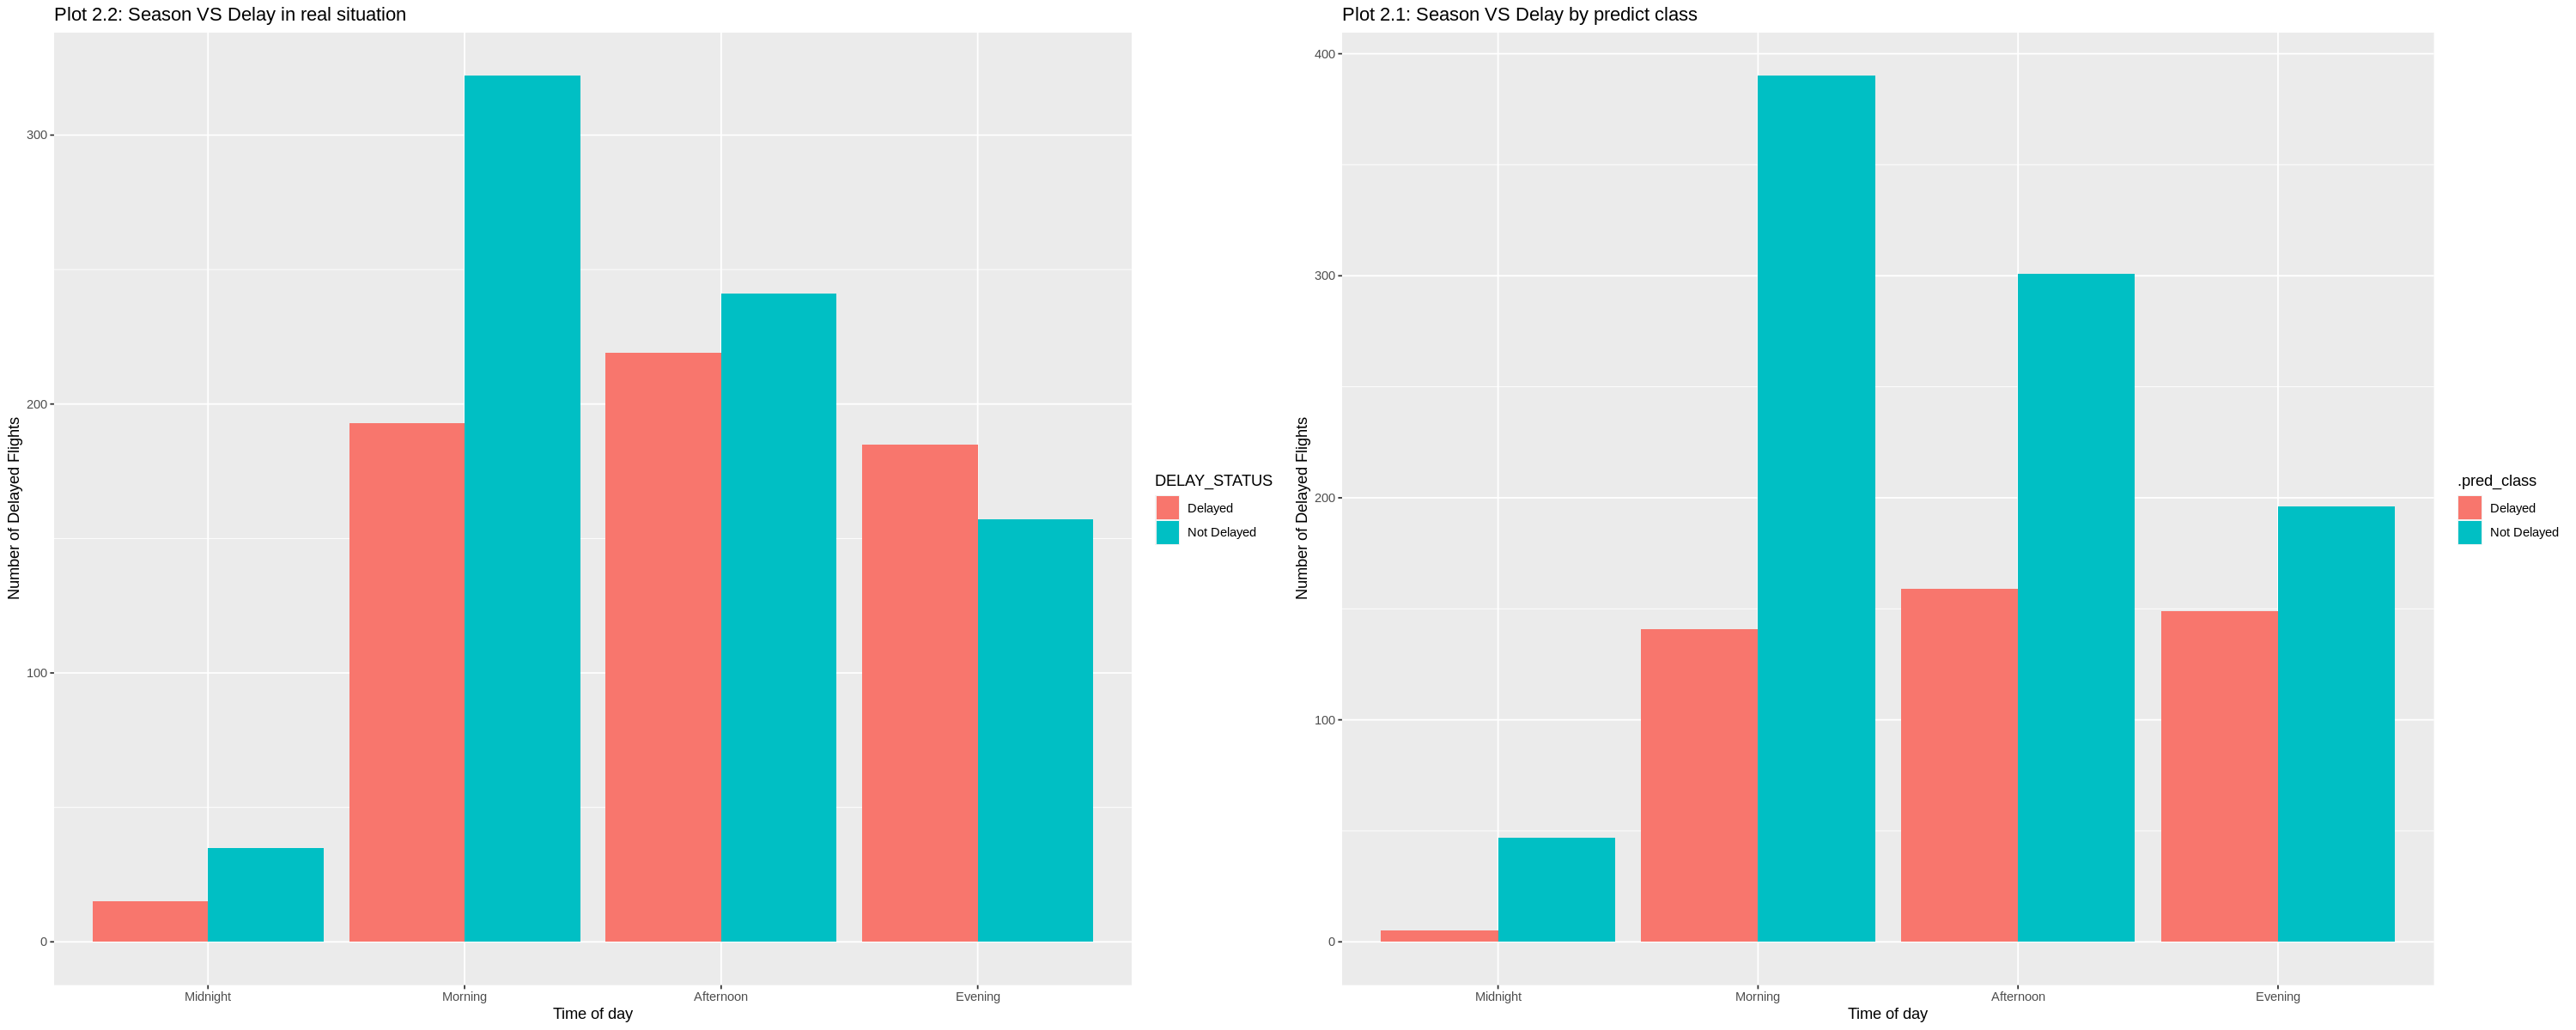

In [17]:
library(cowplot)
day_delay_pred <- flight_pred %>%
                    group_by(.pred_class,DEPARTURE_PART_OF_DAY,SEASON)%>%
                    summarise(n = n(),.groups = "drop")%>%
        ggplot(aes(x = DEPARTURE_PART_OF_DAY, y = n, fill = .pred_class)) + 
        geom_bar(stat = "identity",position = "dodge") +
        xlab("Time of day") +
        ylab("Number of Delayed Flights")+
        ggtitle("Plot 2.1: Season VS Delay by predict class")

day_delay_real <- flight_pred %>%
                    group_by(DELAY_STATUS,DEPARTURE_PART_OF_DAY,SEASON)%>%
                    summarise(n = n(),.groups = "drop")%>%
        ggplot(aes(x = DEPARTURE_PART_OF_DAY, y = n, fill = DELAY_STATUS)) + 
        geom_bar(stat = "identity",position = "dodge") +
        xlab("Time of day") +
        ylab("Number of Delayed Flights")+
        ggtitle("Plot 2.2: Season VS Delay in real situation")

               
plot_grid(day_delay_real, day_delay_pred, ncol=2)

In PLOT 3, we have 2 graphs showing the proportion of flights taking off at each category for DEPARTURE_TIME_OF_DAY and SEASON respectively.  From this visualization, it is clear that most planes take off in the morning and least planes leave at midnight, and plane rides are more popular in the Spring, Summer, and Winter but less popular in Fall.  


$title
[1] "Plot 3: Part of the day VS delay plot"

attr(,"class")
[1] "labels"

$title
[1] "Plot 3: season VS delay plot"

attr(,"class")
[1] "labels"

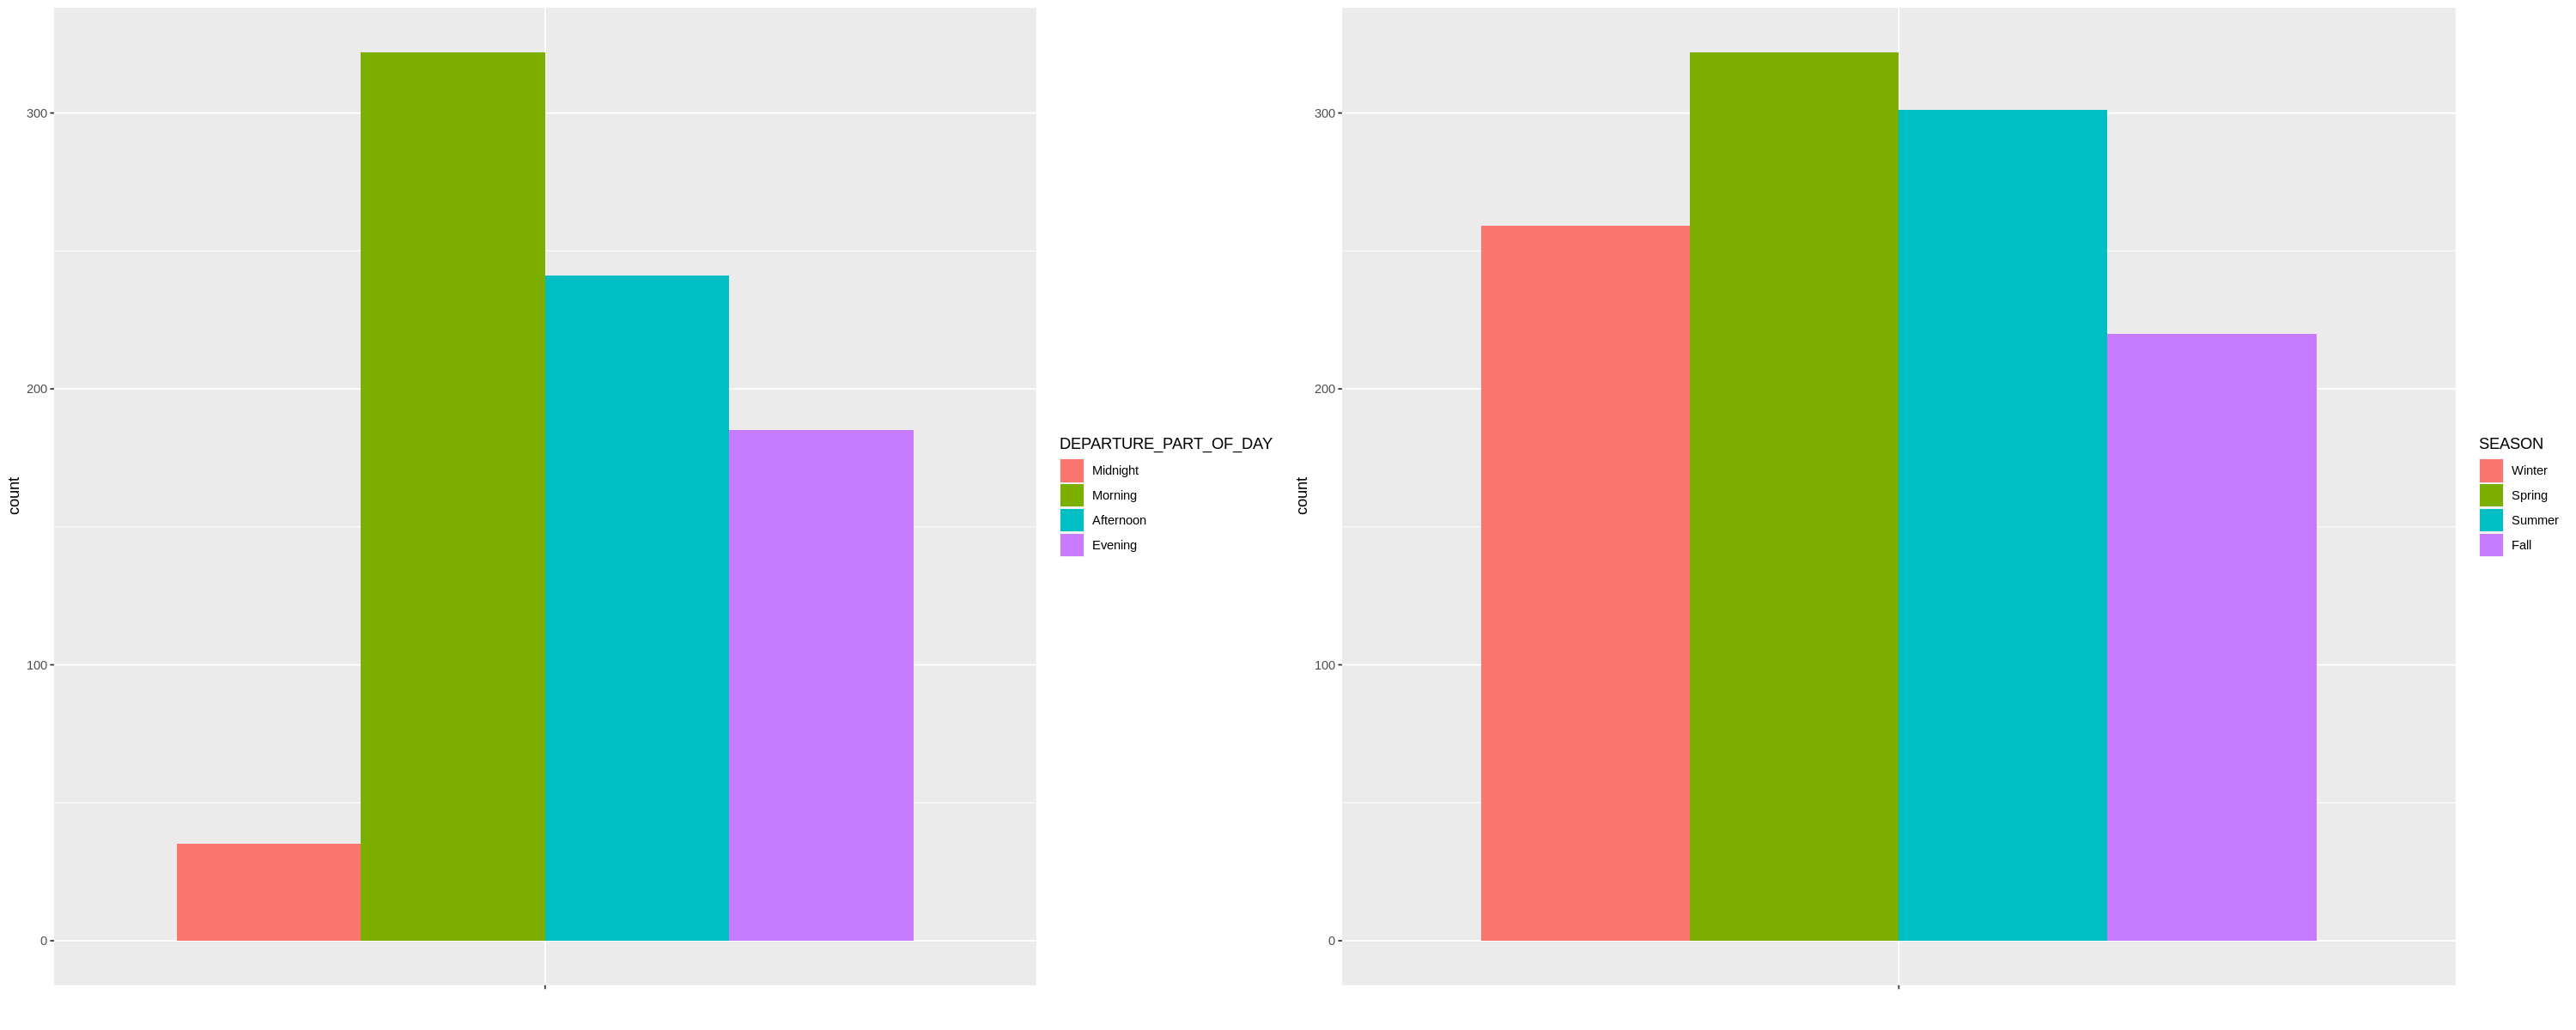

In [18]:
part_of_day_pie <- flight_pred %>%
                    group_by(DELAY_STATUS,DEPARTURE_PART_OF_DAY,SEASON)%>%
                    summarise(n = n(),.groups = "drop")%>%
                    ggplot(aes(x = "", y = n, fill = DEPARTURE_PART_OF_DAY)) + 
                    geom_bar(stat = "identity",position = "dodge") +
                    labs(x = " ", y = "count")
                    ggtitle("Plot 3: Part of the day VS delay plot")

season_pie <- flight_pred %>%
                    group_by(DELAY_STATUS,DEPARTURE_PART_OF_DAY,SEASON)%>%
                    summarise(n = n(),.groups = "drop")%>%
                    ggplot(aes(x = " ", y = n ,fill= SEASON)) + 
                    geom_bar(stat = "identity",position = "dodge")+
                    labs(x = "  ", y = "count")
                    ggtitle("Plot 3: season VS delay plot")
    

plot_grid(part_of_day_pie, season_pie, ncol=2)

In PLOT 4, we see that DEPARTURE_DELAY appears to have a strong positive correlation with a flight being delayed or not.  From our plot, it is clear that if a plane is delayed in the beginning, it is more likely to arrive delayed but there are also some planes that leave delayed but arrive on time.  This could be due to other factors that we have not considered influencing the model.


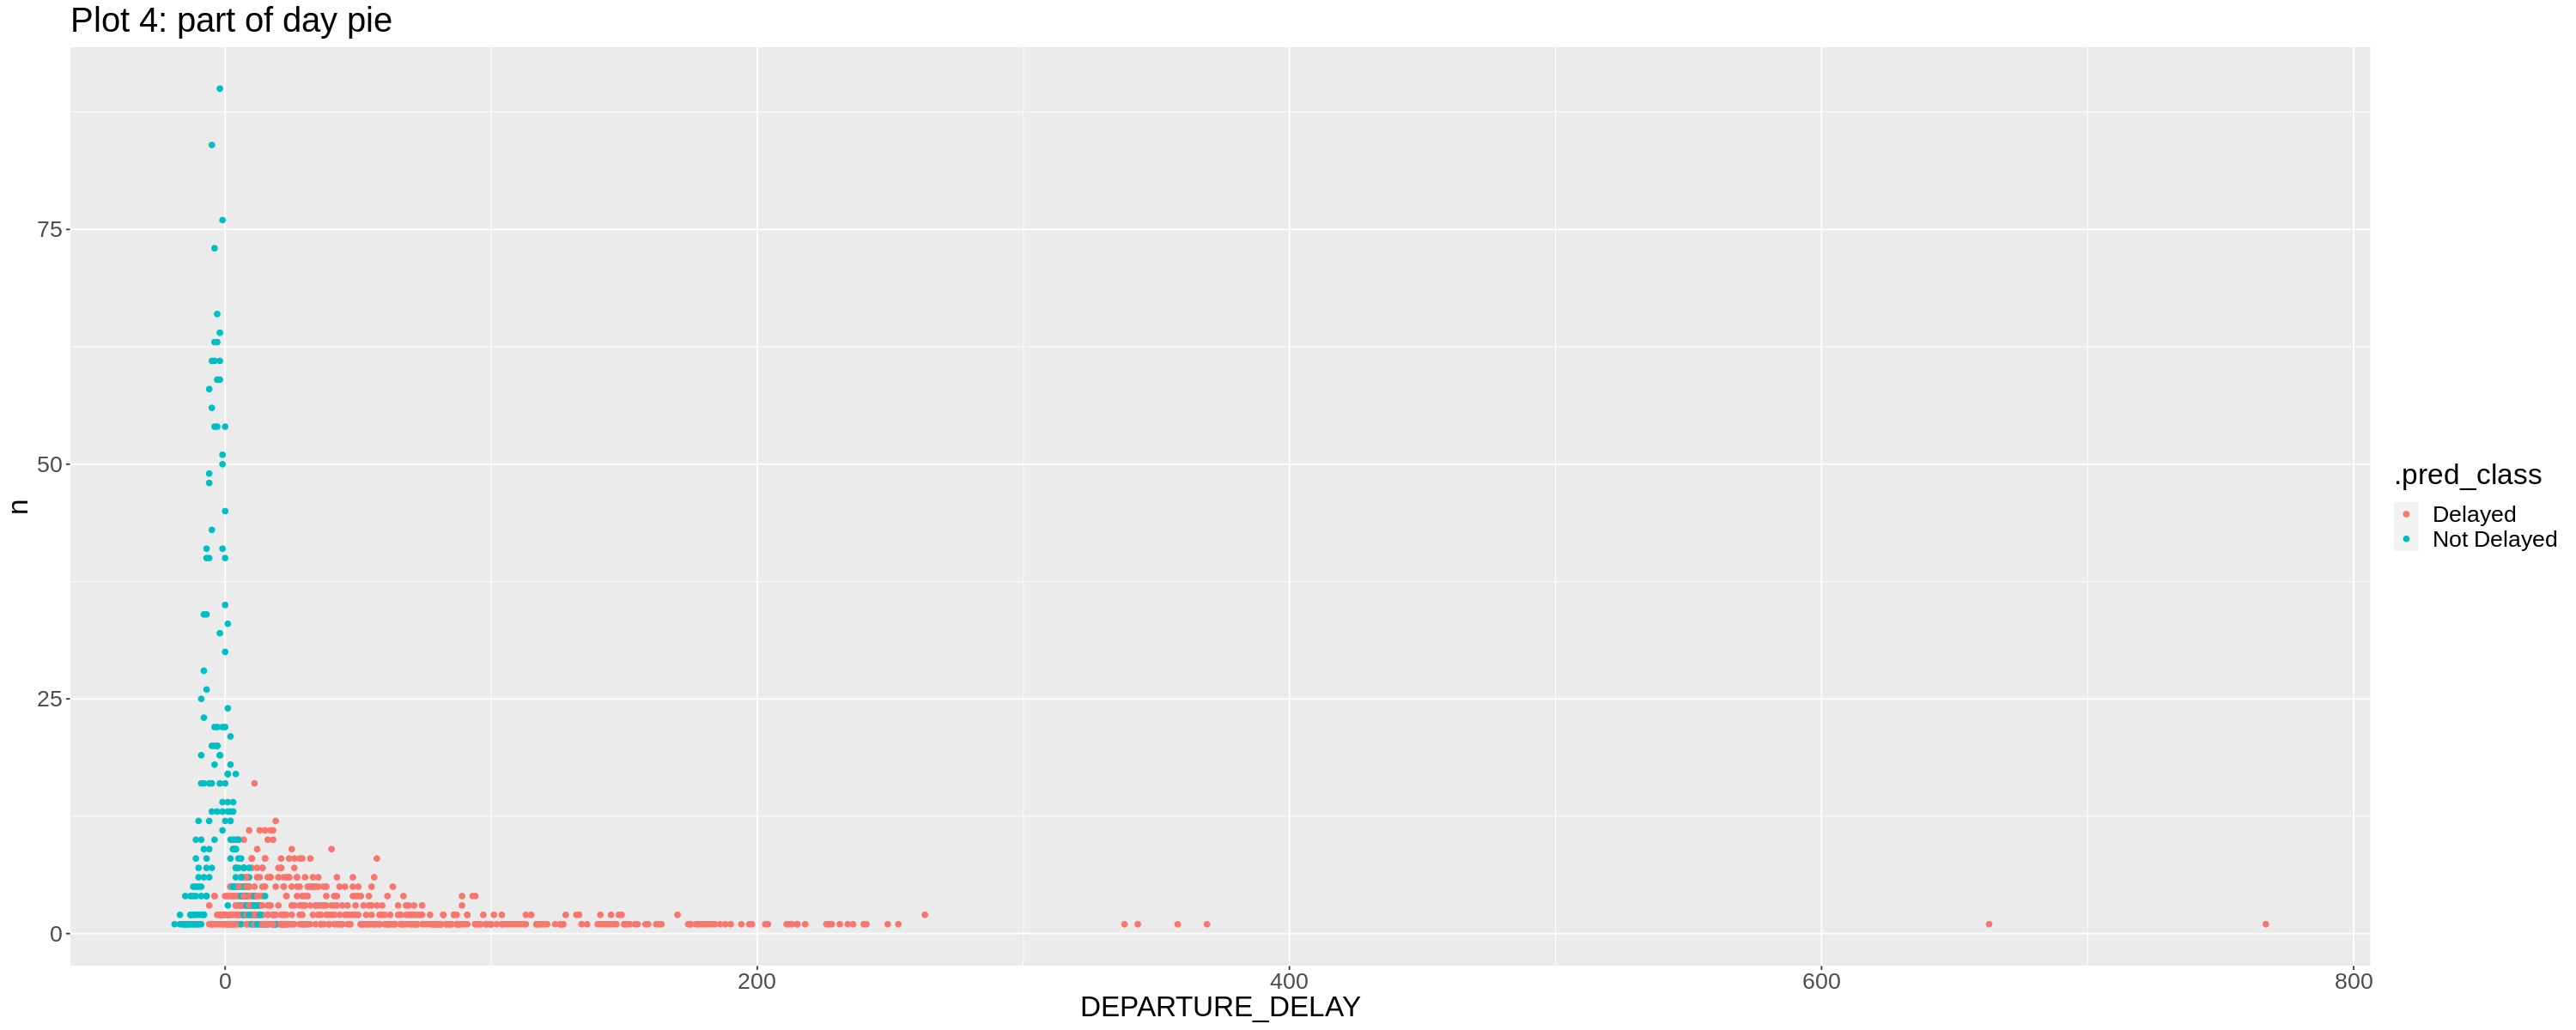

In [19]:
departure_delay_plot <- flight_pred %>%
                    group_by(DELAY_STATUS, SEASON, DEPARTURE_DELAY, .pred_class)%>%
                    summarise(n = n(),.groups = "drop")%>%
                    ggplot(aes(x = DEPARTURE_DELAY, y = n, colour = .pred_class)) + 
                    geom_point(stat = "identity") +
                    ggtitle("Plot 4: part of day pie")+
                    theme(text = element_text(size = 20))

departure_delay_plot

Overall, the goal of this project was to predict whether or not a future flight will be delayed based on the 5 predictor variables we chose.  This analysis could be useful for people seeking to book a vacation and want to avoid long delays.  In addition, this could also be a good tool for people who have important events to attend and need to manage their schedule. If not already implemented, this could also help airlines determine a new scheduling system that avoids long delays for their passengers. Furthermore, this model could also benefit an airport control center.  When a flight takes off from one airport and flies to the another, the destination airport needs an accurate model that can predict whether or not an airplane arrives on time, once the flight takes off.

For further research, we can expand our predictor variables to include the Airline travelled, to see if there is any association between that and flight delays. Other factors that we can also take into consideration include the wind speed, fuel cost, airplane model, and airplane maximum and minimum speed. 
By improving our model, we can provide travellers with accessibility to information that can provide insight on optimal airlines to choose if they wish to avoid delays. 


## Reference

Department of Transportation. (2015). 2015 Flight Delays and Cancellations. Kaggle.com. https://www.kaggle.com/usdot/flight-delays


Timbers, T.-A., Campbell, T., & Lee, M. (n.d.). Data Science: A First Introduction. In ubc-dsci.github.io. Retrieved August 10, 2021, from https://ubc-dsci.github.io/introduction-to-datascience/
